In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('training_mush.csv')

In [8]:
X = df.drop('class', axis=1)

In [11]:
y = df['class']

In [13]:
rf = RandomForestClassifier(random_state=0)

In [14]:
params = {
    'n_estimators' : list(range(10, 50, 10)),
    'max_depth' : list(range(1, 12, 2)),
    'min_samples_leaf' : list(range(1, 7)),
    'min_samples_split' : list(range(2, 9, 2))
}

In [15]:
grid_rf = GridSearchCV(rf, params, cv=3, n_jobs=-1)

In [16]:
grid_rf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]})

In [17]:
grid_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [31]:
best_rf = grid_rf.best_estimator_

In [32]:
fimp = pd.DataFrame(best_rf.feature_importances_,
                    index=X.columns, columns=['importance']) \
                    .sort_values('importance', ascending=False)

<AxesSubplot:xlabel='importance'>

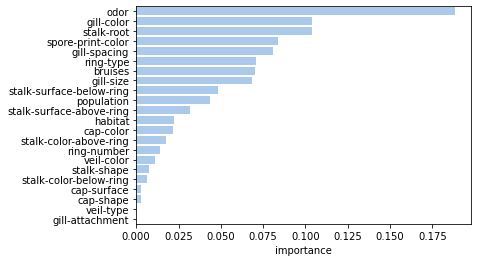

In [33]:
sns.barplot(x="importance", y=fimp.index, data=fimp,
            label="Feature importances", color="b")

In [34]:
X_test = pd.read_csv('testing_mush.csv')

In [46]:
y_pred = pd.DataFrame(best_rf.predict(X_test), columns=['predicts'])

In [47]:
y_pred.head()

,predicts
0,0
1,0
2,1
3,1
4,1


In [48]:
y_pred.value_counts()

predicts
0           1055
1            976
dtype: int64

In [49]:
y_true = pd.read_csv('testing_y_mush.csv')

In [50]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

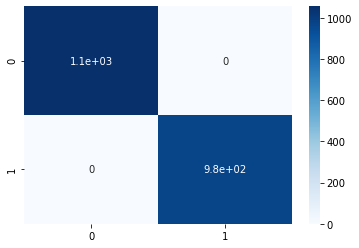

In [51]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")